試用現有資料 和SIRD模型 
找出不隨時間變化的參數 
感染率beta 
復原率 gamma
死亡率 mu

In [1]:
import requests
import pandas as pd
import torch.optim as optim
import numpy as np

#收集從1月27日到九月中的資料
DATA=[]


將每個月分的資料以月為單位讀入

In [2]:
for i in range(27,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [3]:
for i in range(1,30):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [4]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [5]:
for i in range(1,31):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [7]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [8]:
for i in range(1,31):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [9]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [10]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [11]:
for i in range(1,14):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

實際的執行結果放在最底下，接下來內容是分段敘述各步驟內容


取出特定國家的資料

In [24]:
def Data_of_Country(num): 
  Data_Country=[]
  for i in range(len(DATA)):
    if 'Country/Region' in DATA[i]:
      fliter = (DATA[i]['Country/Region']==Country[num])
      if len(DATA[i][fliter])>0:
        Data_Country.append(DATA[i][fliter])
    elif 'Country_Region' in DATA[i]:
      fliter = (DATA[i]['Country_Region']==Country[num])
      if len(DATA[i][fliter])>0:
        Data_Country.append(DATA[i][fliter])
  return Data_Country

取得每天的 S(疑似) I(感染) R(復原) D(死亡) 資料

In [18]:
def take_SIRD_data(Data_Country):
  num_of_Data_Country=len(Data_Country)
  St=[]
  for i in range(num_of_Data_Country):
    St.append(Data_Country[i]['Confirmed'].sum())
  St=np.array(St)
  It=[]
  for i in range(num_of_Data_Country):
    It.append(Data_Country[i]['Confirmed'].sum()-Data_Country[i]['Deaths'].sum()-Data_Country[i]['Recovered'].sum())
  It=np.array(It)
  Rt=[]
  for i in range(num_of_Data_Country):
    Rt.append(Data_Country[i]['Recovered'].sum())
  Rt=np.array(Rt)
  Dt=[]
  for i in range(num_of_Data_Country):
    Dt.append(Data_Country[i]['Deaths'].sum())
  Dt=np.array(Dt)

  return St,It,Rt,Dt

最小化loss function


In [78]:
import numpy as np
from scipy.optimize import minimize

def objective(x):

  #參數 dt 單位天數
  dt=1
  eps=0.0000001
  beta=x[0]
  gamma=x[1]
  mu=x[2]
  
  #藉由finite difference method 做出下一個時間點的預測

  St_pred=St*(1-dt*beta*It/N)
  It_pred=It*(1+dt*(beta*St/N)-dt*(mu+gamma))
  Rt_pred=Rt+(dt*gamma*It)
  Dt_pred=Dt+(dt*mu*It)
  
  # loss function 只取用論文中使用的loss function的前兩項
  loss=0.01*np.log(np.max(It))/np.max(It)*((It[1:len(It)]-It_pred[0:len(It_pred)-1])**2).sum()+((np.log(It[1:len(It)]+eps)-np.log(It_pred[0:len(It_pred)-1]+eps))**2).sum()+0.01*np.log(np.max(It))/np.max(It)*((Dt[1:len(Dt)]-Dt_pred[0:len(Dt_pred)-1])**2).sum()+((np.log(Dt[1:len(Dt)]+eps)-np.log(Dt_pred[0:len(Dt_pred)-1]+eps))**2).sum()                                                                                                                   
  return loss


In [287]:
def find_parameter(num):
  # initial guesses
  beta = 0.05
  gamma = 0.05
  mu = 0.001
  population_N[num]

  x0 = np.zeros(3)
  x0[0] = beta
  x0[1] = gamma
  x0[2] = mu
  b = (0.0,1.0)
  bnds = (b, b, b)

  Sol=minimize(objective,x0,bounds=bnds)
  return Sol.x

預測結果


In [279]:
def predict(beta,gamma,mu,N):
  dt=1
  St_pred=St*(1-dt*beta*It/N)
  It_pred=It*(1+dt*(beta*St/N)-(mu+gamma))
  Rt_pred=Rt+(dt*gamma*It)
  Dt_pred=Dt+(dt*mu*It)
  return St_pred,It_pred,Rt_pred,Dt_pred

實際計算結果

In [280]:
#國家人口數據
Country=['Italy','Germany','United Kingdom','Spain','US','France','China','Belgium']
population_N=[60.36*1000000, 83.02*1000000 ,66.56*1000000 ,46.94*1000000 ,327.2*1000000 ,66.99*1000000, 1386*1000000 ,11.46*1000000]

In [302]:
#Country中國家的編號
number=0

Data_Country=Data_of_Country(number)
[St,It,Rt,Dt]=take_SIRD_data(Data_Country)
N=population_N[number]

#只取前Nday的資料fit model
Nday=100
St=St[0:Nday]
It=It[0:Nday]
Rt=Rt[0:Nday]
Dt=Dt[0:Nday]
[beta,gamma,mu]=find_parameter(number)

#取得用Nday fit的beta,gamma,mu 再預測後面天數
[St,It,Rt,Dt]=take_SIRD_data(Data_Country)
[St_pred,It_pred,Rt_pred,Dt_pred]=predict(beta,gamma,mu,N)

註 下圖藍線為model預測結果 橘線為實際資料 因為人數已千或萬人為單位，所以看不太出人數的差別。
故，另外計算實際最大誤差人數

最大誤差 0.010165095733100316


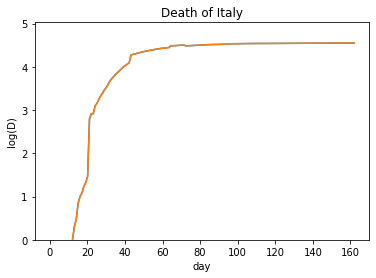

In [303]:
import matplotlib.pyplot as plt
eps=0.00001
dat=np.linspace(0,len(Dt)-1,len(Dt)-1)

plt.plot(dat,np.log10(Dt_pred[0:len(Dt_pred)-1]+eps)) #預測人數
plt.plot(dat,np.log10(Dt[0:len(Dt)-1]+eps))      #實際人數


plt.title('Death of '+Country[number])
plt.xlabel('day')
plt.ylabel('log(D)')
plt.ylim((0))
print('最大誤差',np.linalg.norm((Dt_pred[0:len(Dt_pred)-1]-Dt[0:len(Dt)-1]),np.inf))

最大誤差 0.010165538638830185


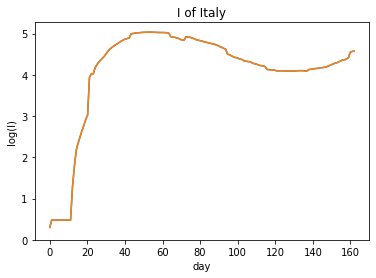

In [304]:
dat=np.linspace(0,len(It_pred)-1,len(It_pred)-1)
eps=0.00001

plt.plot(dat,np.log10(It_pred[0:len(It_pred)-1]+eps)) #預測人數
plt.plot(dat,np.log10(It[0:len(It)-1]+eps))      #實際人數

plt.title('I of '+Country[number])
plt.xlabel('day')
plt.ylabel('log(I)')
plt.ylim((0))
print('最大誤差',np.linalg.norm((It_pred[0:len(It_pred)-1]-It[0:len(It)-1]),np.inf))


最大誤差 0.0


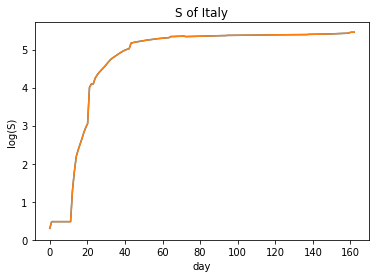

In [305]:
dat=np.linspace(0,len(St_pred)-1,len(St_pred)-1)
eps=0.00001

plt.plot(dat,np.log10(St_pred[0:len(St_pred)-1]+eps)) #預測人數
plt.plot(dat,np.log10(St[0:len(St)-1]+eps))      #實際人數

plt.title('S of '+Country[number])
plt.xlabel('day')
plt.ylabel('log(S)')
plt.ylim((0))
print('最大誤差',np.linalg.norm((St_pred[0:len(St_pred)-1]-St[0:len(St)-1]),np.inf))

最大誤差 4.429093678481877e-07


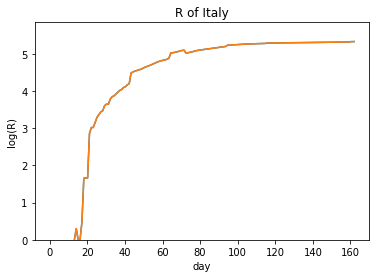

In [306]:
dat=np.linspace(0,len(Rt_pred)-1,len(Rt_pred)-1)
eps=0.00001

plt.plot(dat,np.log10(Rt_pred[0:len(Rt_pred)-1]+eps)) #預測人數
plt.plot(dat,np.log10(Rt[0:len(Rt)-1]+eps))      #實際人數

plt.title('R of '+Country[number])
plt.xlabel('day')
plt.ylabel('log(R)')
plt.ylim((0))
print('最大誤差',np.linalg.norm((Rt_pred[0:len(Rt_pred)-1]-Rt[0:len(Rt)-1]),np.inf))



簡單結論，用固定的參數 beta,gamma,mu 做預測，以長期行為看來是吻合的，但在人數極多時，以一天為單位的人數誤差會較高